In [1]:
import torch
import dlc_practical_prologue as prologue
from importlib import reload
reload(prologue)
from dlc_practical_prologue import *
import Module, modules, optimizers, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *
from optimizers import *
torch.set_grad_enabled(False)

torch.set_default_tensor_type(torch.DoubleTensor)

train_input, train_target, train_classes, test_input, test_target, test_classes = \
       load_random_datasets()

def test_model(model, test_input, test_target):
    test_output = model(test_input)
    output_to_prediction = torch.ge(test_output, 0.5).flatten()
    nb_correct = torch.sum(output_to_prediction == test_target.type(torch.ByteTensor)).item()
    acc_pairs = nb_correct / len(test_input)
    return acc_pairs

nb_hidden1 = 100
nb_hidden2 = 40

#train_input = train_input.view(len(train_input), -1)
#train_target = train_target.type(torch.FloatTensor)
#test_input = test_input.view(len(train_input), -1)
#test_target = test_target.type(torch.FloatTensor)

train_input = train_input.view(len(train_input), -1).type(torch.DoubleTensor)
train_target = train_target.type(torch.DoubleTensor)
test_input = test_input.view(len(train_input), -1).type(torch.DoubleTensor)
test_target = test_target.type(torch.DoubleTensor)

input_size = train_input.shape[1] # 392
nb_epochs = 300

model_mnist = Sequential(
    Linear('fc1', input_size, nb_hidden1), ReLU(),
    Linear('fc2', nb_hidden1, nb_hidden2), Tanh(),
    Linear('fc3', nb_hidden2, 1))

from torch import nn
model_mnist_torch = nn.Sequential(
    nn.Linear(input_size, nb_hidden1), nn.ReLU(),
    nn.Linear(nb_hidden1, nb_hidden2), nn.Tanh(),
    nn.Linear(nb_hidden2, 1))
set_initial_parameters(model_mnist, model_mnist_torch)
del nn


lr = 0.00001
criterion_mnist = BCEWithLogitsLoss()
#grad = criterion_mnist.backward()
#print("grad = ", grad)
optimizer_mnist = SGD(model_mnist, lr=lr)
loss_history_mnist = []
test_acc_history_mnist = []
nb_epochs = 300

for param_dict in model_mnist.param():
        param_dict = next(param_dict)
        for p in param_dict.values():
            print("Checking initial parameter gradients: p.grad = ", p.grad[0][:5])
            break
            
for e in range(nb_epochs):
    optimizer_mnist.zero_grad()
    
    output_mnist = model_mnist(train_input) # torch.Size([1000, 1])
    
    loss_mnist = criterion_mnist(output_mnist.flatten(), train_target)
    loss_history_mnist.append(loss_mnist)
    
    grad_output_mnist = criterion_mnist.backward().view(-1,1)
    
    #criterion_mnist.eval()
    #model_mnist.eval()
    #for module in model_mnist._children.values():
    #    print("{} training = {}".format(module.name, module.training))
    #print("{} training = {}".format(criterion_mnist.name, criterion_mnist.training))
    #output_mnist_eval = model_mnist(train_input)
    #loss_mnist = criterion_mnist(output_mnist.flatten(), train_target)
    #grad_output_mnist = criterion_mnist.backward().view(-1,1)
    #model_mnist.backward(grad_output_mnist)
    #for param_dict in model_mnist.param():
    #    param_dict = next(param_dict)
    #    for p in param_dict.values():
    #        print("Has gradient changed? p.grad = ", p.grad[0][:5])
    #        break
    
    
    #test_acc_mnist = test_model(model_mnist, test_input, test_target)
    #test_acc_history_mnist.append(test_acc_mnist)
    #if e % 40 == 0: print("e = {}, test accuracy = {}, loss = {}".format(e, test_acc_mnist, loss_mnist))
    #criterion_mnist.train()
    #model_mnist.train()
    
    #for param_dict in model_mnist.param():
    #    param_dict = next(param_dict)
    #    for p in param_dict.values():
    #        print("Has gradient changed? p.grad = ", p.grad[0][:5])
    #        break
            
    #for module in model_mnist._children.values():
    #    print("{} training = {}".format(module.name, module.training))
    #print("{} training = {}".format(criterion_mnist.name, criterion_mnist.training))
    #if e % 40 == 0: print("e = {},  loss = {}".format(e, loss_mnist))
    #print("e = {}, test accuracy = {}, loss = {}".format(e, test_acc_mnist, loss_mnist))
    model_mnist.backward(grad_output_mnist)
    optimizer_mnist.step(loss_mnist)

print()
from torch import nn
torch.set_grad_enabled(True)

criterion_mnist_torch = nn.BCEWithLogitsLoss()
optimizer_mnist_torch = torch.optim.SGD(model_mnist_torch.parameters(), lr=lr)
loss_history_mnist_torch = []
test_acc_history_mnist_torch = []

for e in range(nb_epochs):
    optimizer_mnist_torch.zero_grad()
    output_mnist_torch = model_mnist_torch(train_input)
    #print("output = ", output_mnist_torch[:5])
    #print()
    loss_mnist_torch = criterion_mnist_torch(output_mnist_torch.flatten(), train_target)
    loss_history_mnist_torch.append(loss_mnist_torch)
    #if e % 40 == 0: print("e = {},  loss = {}".format(e, loss_mnist_torch))
    test_acc_mnist_torch = test_model(model_mnist_torch, test_input, test_target)
    test_acc_history_mnist_torch.append(test_acc_mnist_torch)
    if e % 40 == 0: print("e = {}, test accuracy = {}, loss = {}".format(e, test_acc_mnist_torch, loss_mnist_torch))
    loss_mnist_torch.backward()
    optimizer_mnist_torch.step()
    
del nn
torch.set_grad_enabled(False)

Checking initial parameter gradients: p.grad =  tensor([0., 0., 0., 0., 0.])
Checking initial parameter gradients: p.grad =  tensor([0., 0., 0., 0., 0.])
Checking initial parameter gradients: p.grad =  tensor([0.])

e = 0, test accuracy = 0.474, loss = 0.755558967308008
e = 40, test accuracy = 0.474, loss = 0.7551218788290056
e = 80, test accuracy = 0.474, loss = 0.7546878639291222
e = 120, test accuracy = 0.473, loss = 0.7542566481184216
e = 160, test accuracy = 0.473, loss = 0.753828143364653
e = 200, test accuracy = 0.473, loss = 0.7534026133130298
e = 240, test accuracy = 0.473, loss = 0.7529797257848212
e = 280, test accuracy = 0.473, loss = 0.7525596207269412


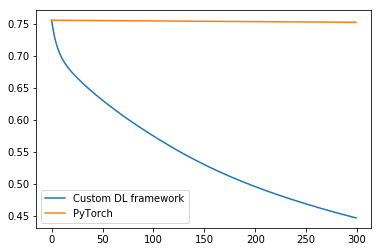

In [6]:
import matplotlib.pyplot as plt
plt.plot(loss_history_mnist, label='Custom DL framework')
plt.plot(loss_history_mnist_torch, label='PyTorch')
plt.legend()
plt.show()


In [3]:
print(test_model(model_mnist, test_input, test_target))

0.742


In [7]:
print(test_model(model_mnist_torch, test_input, test_target))

0.472


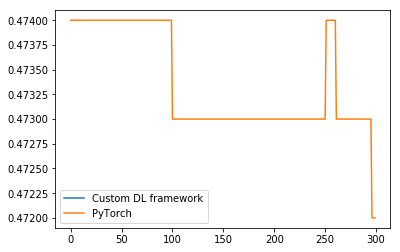

In [5]:
import matplotlib.pyplot as plt
plt.plot(test_acc_history_mnist, label='Custom DL framework')
plt.plot(test_acc_history_mnist_torch, label='PyTorch')
plt.legend()
plt.show()